In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

In [2]:
activity=pd.read_csv("Wearables_dataset/activity_environment_data.csv")

In [3]:
digital=pd.read_csv("Wearables_dataset/digital_interaction_data.csv")

In [4]:
personal=pd.read_csv("Wearables_dataset/personal_health_data.csv")

In [5]:
activity.columns

Index(['User_ID', 'Timestamp', 'Steps', 'Calories_Burned', 'Distance_Covered',
       'Exercise_Type', 'Exercise_Duration', 'Exercise_Intensity',
       'Ambient_Temperature', 'Battery_Level', 'Altitude', 'UV_Exposure'],
      dtype='object')

In [6]:
digital.columns

Index(['User_ID', 'Timestamp', 'Notifications_Received', 'Screen_Time'], dtype='object')

In [7]:
personal.columns

Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions',
       'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp',
       'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Calories_Intake', 'Water_Intake',
       'Stress_Level', 'Mood', 'Skin_Temperature', 'Body_Fat_Percentage',
       'Muscle_Mass', 'Health_Score', 'Anomaly_Flag'],
      dtype='object')

In [8]:
df1=activity[['User_ID','Timestamp','Steps','Calories_Burned']]
df1

,User_ID,Timestamp,Steps,Calories_Burned
0,U_00001,2021-01-01 00:00:00,9146,457.30
1,U_00002,2021-01-01 01:00:00,9362,468.10
2,U_00003,2021-01-01 02:00:00,21,1.05
3,U_00004,2021-01-01 03:00:00,13252,662.60
4,U_00005,2021-01-01 04:00:00,21,1.05
...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15
9996,U_09997,2022-02-21 12:00:00,4492,224.60
9997,U_09998,2022-02-21 13:00:00,4081,204.05
9998,U_09999,2022-02-21 14:00:00,10319,515.95


In [9]:
df2=personal[['Heart_Rate','Blood_Oxygen_Level','Skin_Temperature']]
df2

,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature
0,147,90.658505,32.752993
1,147,97.133360,35.010044
2,176,99.555594,36.797523
3,157,91.444900,32.614592
4,86,96.092103,33.602319
...,...,...,...
9995,75,92.129582,34.745721
9996,62,93.039248,37.668751
9997,129,95.927884,36.353827
9998,93,100.400376,37.443824


In [19]:
df=pd.concat([df1, df2], axis=1)

In [21]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature
0,U_00001,2021-01-01 00:00:00,9146,457.30,147,90.658505,32.752993
1,U_00002,2021-01-01 01:00:00,9362,468.10,147,97.133360,35.010044
2,U_00003,2021-01-01 02:00:00,21,1.05,176,99.555594,36.797523
3,U_00004,2021-01-01 03:00:00,13252,662.60,157,91.444900,32.614592
4,U_00005,2021-01-01 04:00:00,21,1.05,86,96.092103,33.602319
...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,75,92.129582,34.745721
9996,U_09997,2022-02-21 12:00:00,4492,224.60,62,93.039248,37.668751
9997,U_09998,2022-02-21 13:00:00,4081,204.05,129,95.927884,36.353827
9998,U_09999,2022-02-21 14:00:00,10319,515.95,93,100.400376,37.443824


In [23]:
cols = ['Steps', 'Calories_Burned', 'Heart_Rate', 'Blood_Oxygen_Level', 'Skin_Temperature']
X = df[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

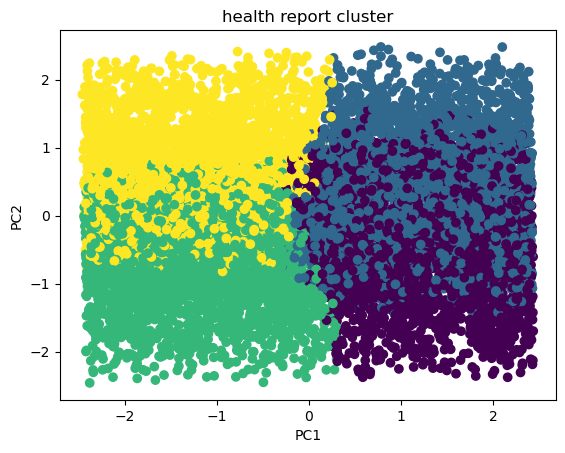

In [29]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('health report cluster')
plt.show()

In [31]:
print(pca.explained_variance_ratio_)

[0.40003309 0.20193193]


In [33]:
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=['PC1', 'PC2'],
    index=cols
)

print(loadings)

                         PC1       PC2
Steps               0.707048  0.007397
Calories_Burned     0.707048  0.007397
Heart_Rate          0.007969 -0.703874
Blood_Oxygen_Level  0.007837 -0.035729
Skin_Temperature   -0.006445  0.709348


In [37]:
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']